# Regression with MLPs

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [23]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=80842e9c94666aa8f2414e923d7895d7c3d43b1144020f5d0012a642a1407537
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [24]:
import wandb

In [25]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [26]:
# load boston housing dataset
house = pd.read_csv('HousingData.csv')
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [27]:
house.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [28]:
# fill missing values with the median
medians = house.median()
house = house.fillna(medians)
house.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
describing = pd.DataFrame(columns = house.columns)
describing.loc["min"] = house.min(axis = 0)
describing.loc["max"] = house.max(axis = 0)
describing.loc["std dev"] = house.std(axis = 0)
describing.loc["mean"] = house.mean(axis = 0)
describing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
std dev,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

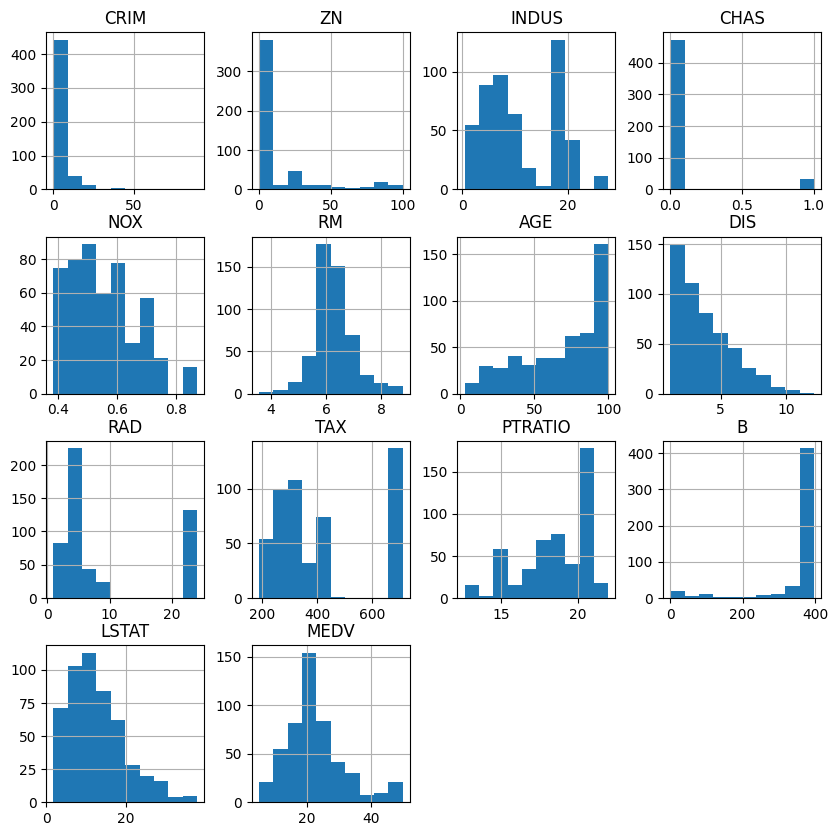

In [6]:
#plotting distribution of all the attributes
house.hist(figsize=(10,10))

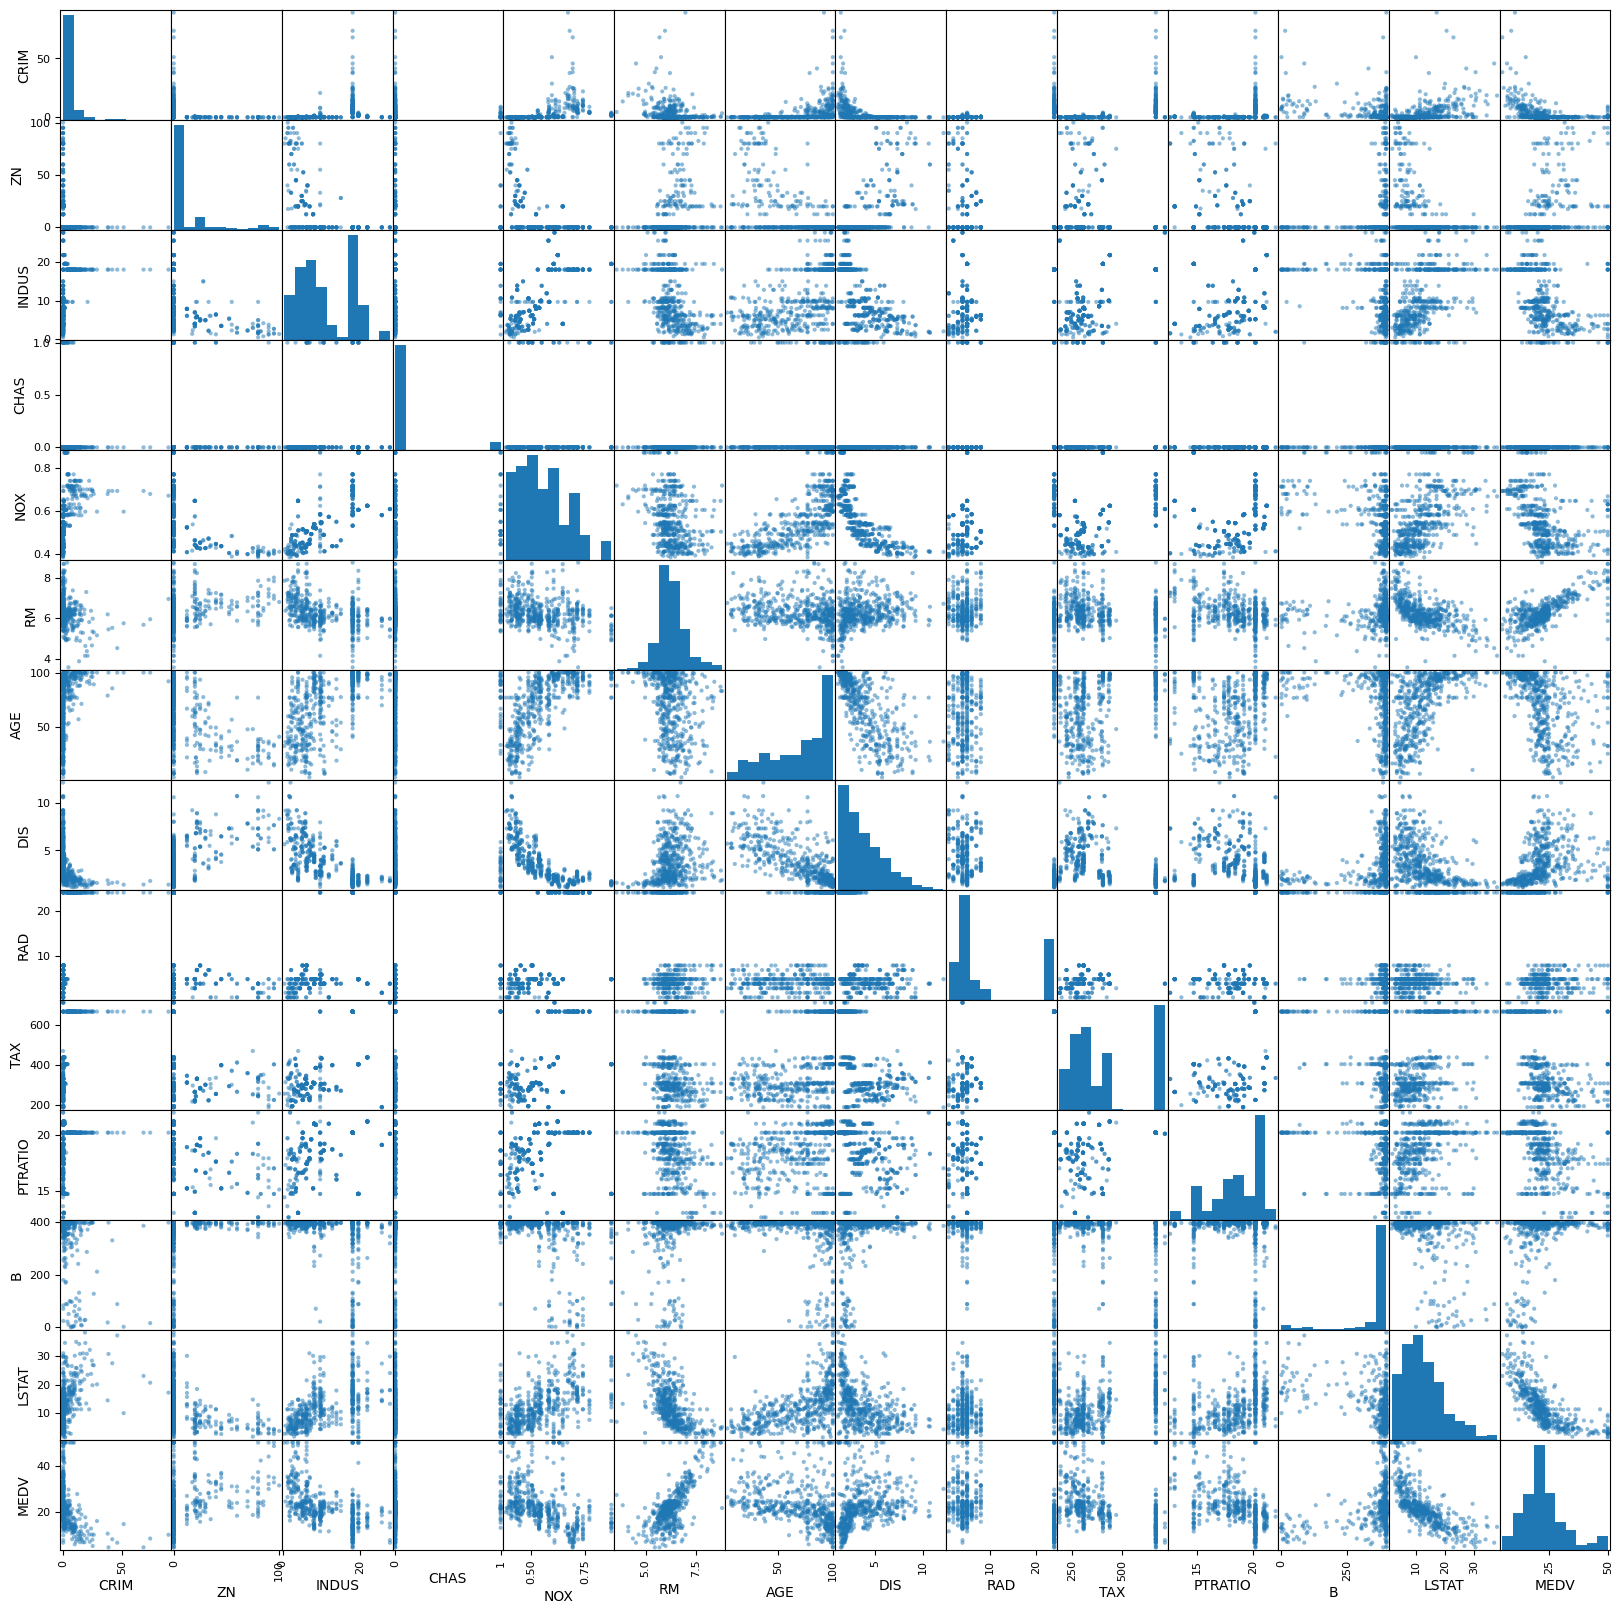

In [7]:
scatter_matrix(house, alpha=0.5, figsize=(20, 20))
plt.show()

In [6]:
# split the data
X = house.iloc[:, :-1].values
y = house.iloc[:, -1].values

In [7]:
# normalize and standardize the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1989)
test_X, val_X, test_y, val_y = train_test_split(test_X, test_y, test_size=0.2, random_state=1989)

In [8]:
# reshape test_y, train_y, val_y to have 1 dimension
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)
val_y = val_y.reshape(-1,1)

In [9]:
test_X.shape, val_X.shape, test_y.shape, val_y.shape

((81, 13), (21, 13), (81, 1), (21, 1))

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidprime(x):
    sigmoid_x = 1 / (1 + np.exp(-x))
    return sigmoid_x * (1 - sigmoid_x)

def tanh(x):
    return np.tanh(x)

def tanhprime(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def reluprime(x):
    return np.where(x > 0, 1, 0)

In [31]:
def MSE(y, pred):
    return np.mean((y - pred)**2)
def RMSE(y, pred):
    return np.sqrt(np.mean((y - pred)**2))
def Rsquared(y, pred):
    return 1 - (np.sum((y - pred)**2) / np.sum((y - np.mean(y))**2))


In [38]:
class MLP():
    def __init__(self, learning_rate, activation_function, optimizers, hidden_layers, neurons):
        self.learning_rate = learning_rate
        self.optimizers = optimizers
        self.hidden_layers = hidden_layers
        self.neurons = neurons
        self.inputlayersize = 0
        self.outputlayersize = 0
        self.X = None

        self.weights = []
        self.biases = []
        if activation_function == "sigmoid":
            self.activation_function = sigmoid
            self.backprop_function = sigmoidprime
        if activation_function == "tanh":
            self.activation_function = tanh
            self.backprop_function = tanhprime
        if activation_function == "relu":
            self.activation_function = relu
            self.backprop_function = reluprime

    def weightsbiases(self):
        # initialize weights, biases
        self.inputlayersize = self.X.shape[1]
        self.outputlayersize = self.y.shape[1]
        self.weights.append(np.random.randn(self.inputlayersize, self.neurons[0]))
        self.biases.append(np.random.randn(self.neurons[0]))
        for i in range(0, self.hidden_layers - 1):
            self.weights.append(np.random.randn(self.neurons[i], self.neurons[i+1]))
            self.biases.append(np.random.randn(self.neurons[i + 1]))
        self.weights.append(np.random.randn(self.neurons[-1], self.outputlayersize))
        self.biases.append(np.random.randn(self.outputlayersize))
        # weights correctly initialized
        # biases correctly initialized

        self.z = [None]*len(self.weights)
        self.a = [None]*len(self.weights)

    def forward(self, X):
        z = np.dot(X, self.weights[0]) + self.biases[0]
        a = self.activation_function(z)
        self.z[0] = z
        self.a[0] = a
        for i in range(1, len(self.weights) - 1):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            a = self.activation_function(z)
            self.z[i] = z
            self.a[i] = a
        z = np.dot(a, self.weights[-1]) + self.biases[-1]
        a = z
        self.z[-1] = z
        self.a[-1] = a

    def backward(self, X, y):
        # initialize weight gradients
        weight_gradients = [np.zeros_like(w) for w in self.weights]
        bias_gradients = [np.zeros_like(b) for b in self.biases]
        # calculate gradients
        error = self.a[-1] - y
        weight_gradients[-1] = np.dot(self.a[-2].T, error)
        # print(error)
        bias_gradients[-1] = np.sum(error, axis=0)
        # print(bias_gradients[-1])

        for i in range(len(self.weights)-2, 0, -1):
            error = np.dot(error, self.weights[i+1].T) * self.backprop_function(self.z[i])
            weight_gradients[i] = np.dot(self.a[i-1].T, error)
            bias_gradients[i] = np.sum(error,axis=0)

        error = np.dot(error, self.weights[1].T) * self.backprop_function(self.z[0])
        weight_gradients[0] = np.dot(X.T, error)
        bias_gradients[0] = np.sum(error,axis=0)

        # update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i] / X.shape[0]
            self.biases[i] -= self.learning_rate * bias_gradients[i] / X.shape[0]

    def lossandaccuracy(self, X, y):
        self.forward(X)
        mse = ((self.a[-1] - y) ** 2).mean()
        return mse

    def train(self, X, y, val_X, val_y, epochs):
        self.X = X
        self.y = y
        self.weightsbiases()

        # pick optimizer
        if self.optimizers == "sgd":
            batch_size = 1
        if self.optimizers == "mini-batch":
            batch_size = 32
        if self.optimizers == "batch":
            batch_size = self.X.shape[0]

        # initialize loss
        loss_val = [None]*epochs
        loss_train = [None]*epochs
        accuracy_val = [None]*epochs
        accuracy_train = [None]*epochs
        for epoch in range(epochs):
            for i in range(0, self.X.shape[0], batch_size):
                batch_x = self.X[i:i+batch_size]
                batch_y = self.y[i:i+batch_size]
                self.forward(batch_x)
                self.backward(batch_x, batch_y)
            # calculate loss
            loss_val[epoch] = self.lossandaccuracy(val_X, val_y)
            loss_train[epoch] = self.lossandaccuracy(self.X, self.y)
            # wandb.log({"Loss": loss_val[epoch]})
            print("Epoch: ", epoch, " Loss: ", loss_val[epoch])

    def predict(self, X):
        self.forward(X)
        prediction = self.a[-1]
        return prediction




## Hyperparameter Tuning

In [34]:
sweep_config = {
    'method': 'grid',
    'metric': {
        'name': 'accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.001, 0.01]
        },
        'optimizers': {
            'values': ['sgd', 'batch', 'mini-batch']
        },
        'neurons': {
            'values': [[2, [10, 10]], [3, [20, 10, 7]]]
        },
        'activation_functions': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'epochs': {
            'values': [200, 400]
        },
    }
}

In [35]:
sweep_id = wandb.sweep(sweep_config, project="assignment-3 part-3")

Create sweep with ID: al5z23fi
Sweep URL: https://wandb.ai/sanika-damle/assignment-3%20part-3/sweeps/al5z23fi


In [36]:
def mlp_regression():
    with wandb.init() as run:
        lr = wandb.config.learning_rate
        optimizers = wandb.config.optimizers
        hidden_layers = wandb.config.neurons[0]
        neurons = wandb.config.neurons[1]
        activation_function = wandb.config.activation_functions
        epochs = wandb.config.epochs
        mlp = MLP(lr, activation_function, optimizers, hidden_layers, neurons)
        mlp.train(train_X, train_y, val_X, val_y, epochs)
        pred = mlp.predict(test_X)
        pred = pred.reshape(-1, 1)
        wandb.log({"MSE": MSE(test_y, pred), "RMSE": RMSE(test_y, pred), "Rsquared": Rsquared(test_y, pred)})

wandb.agent(sweep_id, function = mlp_regression)


wandb: Agent Starting Run: x0kgaljj with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd
wandb: Currently logged in as: sanika-damle. Use `wandb login --relogin` to force relogin


Loss,█▆▂▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
MSE,▁
RMSE,▁
Rsquared,▁
Loss,11.81579
MSE,34.79931
RMSE,5.89909
Rsquared,0.6641


wandb: Agent Starting Run: jdstfg0u with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,██▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,136.53659
MSE,165.95988
RMSE,12.88254
Rsquared,-0.60191


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kl65284p with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,31.14974
MSE,61.7437
RMSE,7.85772
Rsquared,0.40403


wandb: Agent Starting Run: 5t3531ei with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,4.97463
MSE,21.05502
RMSE,4.58857
Rsquared,0.79677


wandb: Agent Starting Run: 9n9ypem0 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,██▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,124.13652
MSE,153.47573
RMSE,12.38853
Rsquared,-0.48141


wandb: Agent Starting Run: 7dkfu1um with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,52.49823
MSE,101.45071
RMSE,10.07227
Rsquared,0.02076


wandb: Agent Starting Run: iuhdxmdd with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,▃▃▁▁▂▃▃▄▄▅▂▄▄▅▆▅▅▆▆█▇▇▇█████▇▇▇▇▆▆▆▆▆▆▆▆
MSE,▁
RMSE,▁
Rsquared,▁
Loss,28.72064
MSE,19.8829
RMSE,4.45902
Rsquared,0.80808


wandb: Agent Starting Run: malzobv9 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,26.77248
MSE,66.63372
RMSE,8.16295
Rsquared,0.35682


wandb: Agent Starting Run: 1usyvtg2 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,6.99091
MSE,26.79537
RMSE,5.17642
Rsquared,0.74136


wandb: Agent Starting Run: njpj92zf with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,▇▅▅▂▁▃▂▃▃▃▃▂▂▂▁▂▂▃▂▂▃▄▅▅▅▅▆▆▆▆▆▇▇▆▇▆▇██▇
MSE,▁
RMSE,▁
Rsquared,▁
Loss,15.1127
MSE,25.95212
RMSE,5.09432
Rsquared,0.7495


wandb: Agent Starting Run: n9cm2coo with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▇▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,26.61399
MSE,62.91275
RMSE,7.93176
Rsquared,0.39274


wandb: Agent Starting Run: hgbjyf90 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,5.30191
MSE,24.03035
RMSE,4.90208
Rsquared,0.76805


wandb: Agent Starting Run: 26nqn89l with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,5.46439
MSE,23.85615
RMSE,4.88428
Rsquared,0.76973


wandb: Agent Starting Run: pfox0a5f with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,██▇▆▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,56.98702
MSE,91.38977
RMSE,9.5598
Rsquared,0.11787


wandb: Agent Starting Run: rhz6rqmo with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,14.11063
MSE,36.97842
RMSE,6.08099
Rsquared,0.64307


wandb: Agent Starting Run: 6fg58kdy with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,10.7739
MSE,22.58235
RMSE,4.75209
Rsquared,0.78203


wandb: Agent Starting Run: nx2nk6x7 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,██▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,116.32143
MSE,145.51875
RMSE,12.06312
Rsquared,-0.4046


wandb: Agent Starting Run: kkc4pm3c with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.27783
MSE,42.08414
RMSE,6.48723
Rsquared,0.59379


wandb: Agent Starting Run: myjaguq1 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,▇▆▆▇█▄▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,6.69934
MSE,29.30488
RMSE,5.4134
Rsquared,0.71714


wandb: Agent Starting Run: efwotxy8 with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,14.4163
MSE,41.82394
RMSE,6.46714
Rsquared,0.5963


wandb: Agent Starting Run: ywrk36yi with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,5.92523
MSE,23.45453
RMSE,4.84299
Rsquared,0.77361


wandb: Agent Starting Run: pqgjnmfi with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,▆▆▁▁▃▆▅█▆█▇▄▄▂▂▃▂▃▂▁▂▂▂▂▂▂▃▃▄▃▄▄▄▅▄▄▅▅▅▆
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.14353
MSE,18.31085
RMSE,4.27912
Rsquared,0.82326


wandb: Agent Starting Run: kd1x9ent with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▇▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,20.01704
MSE,54.642
RMSE,7.39202
Rsquared,0.47257


wandb: Agent Starting Run: 85gf9snu with config:
wandb: 	activation_functions: sigmoid
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,14.1985
MSE,17.49741
RMSE,4.18299
Rsquared,0.83111


wandb: Agent Starting Run: cqaddrzr with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▃▂▁▁▁▁▁▁▁▂▁▁▂▂▂▂▂▂▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▃▃▃▃▄▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,13.94594
MSE,26.74935
RMSE,5.17198
Rsquared,0.7418


wandb: Agent Starting Run: y3rt4b0l with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,128.55609
MSE,196.99002
RMSE,14.03531
Rsquared,-0.90143


wandb: Agent Starting Run: gu60k1by with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.31835
MSE,50.60716
RMSE,7.11387
Rsquared,0.51152


wandb: Agent Starting Run: i25kie76 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▄▃▂▂▂▃▂▂▁▁▁▁▂▁▂▁▂▂▃▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▃▂▃▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,11.84154
MSE,38.57073
RMSE,6.21053
Rsquared,0.6277


wandb: Agent Starting Run: dh2psvm3 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,██▇▇▆▆▆▆▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,98.3208
MSE,137.98391
RMSE,11.74666
Rsquared,-0.33188


wandb: Agent Starting Run: 13uajdq2 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▆▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,22.88728
MSE,50.27248
RMSE,7.09031
Rsquared,0.51475


wandb: Agent Starting Run: 6pwk269j with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,▆█▅▄▂▅▆▂▁▃▂▁▄▂▅▆▅▂▃▃▁▃▂▁▂▅▂▂▂▂▃▂▂▅▃▅▅▄▅▅
MSE,▁
RMSE,▁
Rsquared,▁
Loss,23.12793
MSE,44.29673
RMSE,6.65558
Rsquared,0.57243


wandb: Agent Starting Run: u3s0oawf with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,18.57747
MSE,45.58041
RMSE,6.75133
Rsquared,0.56004


wandb: Agent Starting Run: 6v595sbf with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▅▅▄▃▂▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄
MSE,▁
RMSE,▁
Rsquared,▁
Loss,28.53041
MSE,30.41832
RMSE,5.51528
Rsquared,0.70639


wandb: Agent Starting Run: 79v97zhx with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,▄▁▁▂▄▂▅▅▁▂▇▅▅▇██▅▅▅▂▂▃▂▂▂▂▂▂▂▂▅▅▅▅▅▄▅▅▅▅
MSE,▁
RMSE,▁
Rsquared,▁
Loss,39.01876
MSE,70.03458
RMSE,8.36867
Rsquared,0.324


wandb: Agent Starting Run: 4yf9wxv6 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▇▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,22.57536
MSE,63.7635
RMSE,7.98521
Rsquared,0.38453


wandb: Agent Starting Run: ttsq6vbm with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▄▃▃▃▂▃▃▂▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,20.03001
MSE,33.0107
RMSE,5.74549
Rsquared,0.68137


wandb: Agent Starting Run: r2x226gx with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▃▁▁▂▂▃▃▄▅▅▅▅▆▆▆▆▇▇▇▇█▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇█▇
MSE,▁
RMSE,▁
Rsquared,▁
Loss,26.33069
MSE,32.92161
RMSE,5.73774
Rsquared,0.68223


wandb: Agent Starting Run: d64w46mv with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,██▇▆▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,51.09381
MSE,94.15808
RMSE,9.70351
Rsquared,0.09115


wandb: Agent Starting Run: x1dx0hf2 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,17.63904
MSE,36.79168
RMSE,6.06561
Rsquared,0.64487


wandb: Agent Starting Run: b2ze4vag with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,▇▃▆▄▅▇▄█▆▅▄▅▅▅▄▅▂▃▄▅▃▄▄▆▅▅▅▃▂▄▃▄▅▅▆▅▅▅▁▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.66217
MSE,31.65791
RMSE,5.62654
Rsquared,0.69443


wandb: Agent Starting Run: bzngh6lw with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,██▇▇▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,47.72582
MSE,98.99349
RMSE,9.94955
Rsquared,0.04448


wandb: Agent Starting Run: 3kdtdj9n with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,24.75515
MSE,46.46363
RMSE,6.81642
Rsquared,0.55151


wandb: Agent Starting Run: x1otcdoi with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,▆▇█▃▅▄▂▂▃▃▁▃▂▁▂▄▆▁▂▂▃▂▃▂▃▂▂▂▃▁▁▁▂▃▃▃▃▃▄▄
MSE,▁
RMSE,▁
Rsquared,▁
Loss,15.07792
MSE,47.72111
RMSE,6.90805
Rsquared,0.53938


wandb: Agent Starting Run: js1as539 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,22.6406
MSE,42.9187
RMSE,6.55124
Rsquared,0.58573


wandb: Agent Starting Run: btu7vkem with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▇▂▁▁▂▁▁▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,13.09813
MSE,34.03538
RMSE,5.83398
Rsquared,0.67148


wandb: Agent Starting Run: wznhkil0 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,▅▅▇▇▇▇▄▅▃▁█▅▅▃▂██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
MSE,▁
RMSE,▁
Rsquared,▁
Loss,41.49999
MSE,84.39985
RMSE,9.18694
Rsquared,0.18534


wandb: Agent Starting Run: g9e41e2g with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,16.99656
MSE,46.48071
RMSE,6.81768
Rsquared,0.55135


wandb: Agent Starting Run: 0tsm2tn3 with config:
wandb: 	activation_functions: tanh
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▃▁▁▂▂▄▄▃▃▃▃▄▅▆▄▃▄▄▄▄▅▄▄▅▅▄▄▄▄▄█▄▄▄▅▅▄▅▅
MSE,▁
RMSE,▁
Rsquared,▁
Loss,33.35924
MSE,65.51567
RMSE,8.09418
Rsquared,0.36762


wandb: Agent Starting Run: 8x0k952f with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▆▅▅▄▃▂▁▁▁▂▂▂▂▂▃▃▃▃▃▄▃▃▃▃▃▃▂▂▂▂▂▁▂▂▂▂▂▂▂
MSE,▁
RMSE,▁
Rsquared,▁
Loss,9.03817
MSE,23.60429
RMSE,4.85842
Rsquared,0.77216


wandb: Agent Starting Run: t44cjldf with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,30.9539
MSE,55.06868
RMSE,7.42083
Rsquared,0.46846


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5pg3g3t9 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.53946
MSE,30.42983
RMSE,5.51632
Rsquared,0.70628


wandb: Agent Starting Run: n37jghdn with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,54.39865
MSE,103.62516
RMSE,10.17964
Rsquared,-0.00023


wandb: Agent Starting Run: zfu15mgs with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,22.23582
MSE,67.72891
RMSE,8.22976
Rsquared,0.34625


wandb: Agent Starting Run: tfe39yqv with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,10.12319
MSE,25.96973
RMSE,5.09605
Rsquared,0.74933


wandb: Agent Starting Run: xvolsas0 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,53.79129
MSE,103.60125
RMSE,10.17847
Rsquared,-0.0


wandb: Agent Starting Run: 13almele with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,▇█▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,9.40061
MSE,39.06181
RMSE,6.24995
Rsquared,0.62296


wandb: Agent Starting Run: 0p1no963 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.31465
MSE,63.48754
RMSE,7.96791
Rsquared,0.38719


wandb: Agent Starting Run: 9e8rdffl with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,53.79129
MSE,103.60125
RMSE,10.17847
Rsquared,-0.0


wandb: Agent Starting Run: 9fynej1e with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▂▂▂▂▂▂▁▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,14.48502
MSE,72.51983
RMSE,8.51586
Rsquared,0.30001


wandb: Agent Starting Run: mq4nd8d5 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 200
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,54.55806
MSE,103.64939
RMSE,10.18083
Rsquared,-0.00046


wandb: Agent Starting Run: l0q1h4rw with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,▇▃▂▁▂▂▂▁▄▅▅▆▇▄▄▃▄▅▅▄▄▅▇▄▇▄▆▅█▆▆▄▄▅▃▄▃▃▄▃
MSE,▁
RMSE,▁
Rsquared,▁
Loss,8.64932
MSE,31.53266
RMSE,5.61539
Rsquared,0.69563


wandb: Agent Starting Run: 2q9faii4 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,9.04307
MSE,47.5696
RMSE,6.89707
Rsquared,0.54084


wandb: Agent Starting Run: 3aq1dsqa with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,10.23349
MSE,25.12432
RMSE,5.01242
Rsquared,0.75749


wandb: Agent Starting Run: 4k5gn5kl with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


Loss,█▄▅▃▂▂▂▂▃▁▂▂▂▂▂▁▁▁▁▂▃▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▃▃
MSE,▁
RMSE,▁
Rsquared,▁
Loss,22.54363
MSE,26.79727
RMSE,5.17661
Rsquared,0.74134


wandb: Agent Starting Run: h0amgnle with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,12.6157
MSE,46.81277
RMSE,6.84199
Rsquared,0.54814


wandb: Agent Starting Run: xb6b5jzu with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.001
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃
MSE,▁
RMSE,▁
Rsquared,▁
Loss,18.68807
MSE,38.15549
RMSE,6.17701
Rsquared,0.63171


wandb: Agent Starting Run: e2jb42h9 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: sgd


Loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,53.79129
MSE,103.60125
RMSE,10.17847
Rsquared,-0.0


wandb: Agent Starting Run: 3db673kl with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: batch


Loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,30.94745
MSE,23.38813
RMSE,4.83613
Rsquared,0.77425


wandb: Agent Starting Run: rm7rf83z with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [2, [10, 10]]
wandb: 	optimizers: mini-batch


Loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,6.63676
MSE,20.78995
RMSE,4.5596
Rsquared,0.79933


wandb: Agent Starting Run: bo4asbwg with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: sgd


<ipython-input-33-79dc87835b0f>:67: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * self.backprop_function(self.z[i])


Loss,nan
MSE,nan
RMSE,nan
Rsquared,nan


wandb: Agent Starting Run: u9trie1s with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: batch


Loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,55.31878
MSE,103.77613
RMSE,10.18706
Rsquared,-0.00169


wandb: Agent Starting Run: mimlhze8 with config:
wandb: 	activation_functions: relu
wandb: 	epochs: 400
wandb: 	learning_rate: 0.01
wandb: 	neurons: [3, [20, 10, 7]]
wandb: 	optimizers: mini-batch


Loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,▁
RMSE,▁
Rsquared,▁
Loss,54.6405
MSE,103.65981
RMSE,10.18135
Rsquared,-0.00057


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Best version of the model

In [39]:
model = MLP(0.001, "sigmoid", "mini-batch", 2, [10, 10])
model.train(train_X, train_y, val_X, val_y, 400)

Epoch:  0  Loss:  632.5376517186734
Epoch:  1  Loss:  567.3968599531523
Epoch:  2  Loss:  509.95506154754463
Epoch:  3  Loss:  458.5020329051285
Epoch:  4  Loss:  411.9784718133089
Epoch:  5  Loss:  369.72790184809526
Epoch:  6  Loss:  331.3329324064016
Epoch:  7  Loss:  296.5057849391419
Epoch:  8  Loss:  265.02053948561195
Epoch:  9  Loss:  236.67977862811088
Epoch:  10  Loss:  211.3043888545726
Epoch:  11  Loss:  188.73089548600132
Epoch:  12  Loss:  168.80359072344163
Epoch:  13  Loss:  151.35951334005517
Epoch:  14  Loss:  136.21473901823646
Epoch:  15  Loss:  123.16098370345829
Epoch:  16  Loss:  111.9734791617577
Epoch:  17  Loss:  102.42423053130447
Epoch:  18  Loss:  94.29431486403797
Epoch:  19  Loss:  87.38213041941636
Epoch:  20  Loss:  81.50744292135617
Epoch:  21  Loss:  76.51235287407371
Epoch:  22  Loss:  72.26041951156404
Epoch:  23  Loss:  68.63485705968199
Epoch:  24  Loss:  65.53637080250222
Epoch:  25  Loss:  62.880948200585244
Epoch:  26  Loss:  60.59776525287663


In [40]:
# predict test_X
pred = model.predict(test_X)
pred = pred.reshape(-1,1)
print("MSE: ", MSE(test_y, pred))
print("RMSE: ", RMSE(test_y, pred))
print("R squared: ", Rsquared(test_y, pred))

MSE:  36.52260976865168
RMSE:  6.043393894878248
R squared:  0.6474693058040843
